In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import warnings

In [ ]:
!pip install xgboost
!pip install optuna

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/MLP Project/train.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/MLP Project/test.csv")

In [ ]:
print(train_data.shape)
print(test_data.shape)

(100000, 76)
(10000, 75)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

There are 100,000 rows and 76 columns in the train dataset & 10,000 rows and 75 columns in the test dataset

In [ ]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [ ]:
train_data.tail()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
99995,a378b2196a7a1d8ee0d4f989ee46730e,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1582.0,0,7.0,0,68585.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-21 00:59:00,2018-09-20,0
99996,7f4433ca05d24b9bbdd3932f8b05e61f,win8defender,1.1.15100.1,4.18.1806.18062,1.273.1156.0,0,7.0,0,11280.0,2.0,...,0,0.0,0,0,0.0,0.0,3.0,2018-08-10 07:23:00,2018-07-10,0
99997,d6852dfff534e03d5ddfd3c7875ab072,win8defender,1.1.15200.1,4.18.1807.18075,1.275.209.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,1.0,1.0,2018-08-26 23:51:00,2018-03-13,1
99998,70a8dc682128c9ff78a3de5aea9dac74,win8defender,1.1.14901.4,4.16.17656.18052,1.269.641.0,0,7.0,0,53447.0,1.0,...,1,0.0,1,1,1.0,0.0,1.0,2018-06-04 17:13:00,2018-05-08,0
99999,ad9c385b53f2ca788933a39603b84eda,win8defender,1.1.15000.2,4.18.1806.18062,1.271.1003.0,0,7.0,0,7945.0,2.0,...,1,0.0,0,0,0.0,1.0,11.0,2018-07-14 15:36:00,2018-08-14,0


# Exploratory Data Analysis

Here we are checking if there are null values in columns. Machine Id has 0 null values while RealtimeProtectionState has 66 null values.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_data.isnull().sum()

,0
MachineID,0
ProductName,0
EngineVersion,0
AppVersion,0
SignatureVersion,0
IsBetaUser,0
RealTimeProtectionState,66
IsPassiveModeEnabled,0
AntivirusConfigID,76
NumAntivirusProductsInstalled,76


These are the columns with no missing values

These columns doesnt require any imputation as there arent any missing values

There are 33 columns which have missing values.

In [ ]:
no_missing_cols = train_data.columns[train_data.isnull().sum() == 0]
print("Columns with no missing values:")
print(no_missing_cols)
print("\nNumber of columns with no missing values:", len(no_missing_cols))

Columns with no missing values:
Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'IsPassiveModeEnabled', 'HasTpm',
       'CountryID', 'GeoRegionID', 'LocaleEnglishNameID', 'PlatformType',
       'Processor', 'OSVersion', 'OSBuildNumber', 'OSProductSuite',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'AutoSampleSubmissionEnabled', 'MDC2FormFactor', 'DeviceFamily',
       'HasOpticalDiskDrive', 'PowerPlatformRole', 'NumericOSVersion',
       'OSArchitecture', 'OSBranch', 'OSBuildNumberOnly',
       'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName',
       'OSInstallType', 'OSUILocaleID', 'AutoUpdateOptionsName',
       'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'IsSecureBootEnabled', 'IsTouchEnabled', 'IsPenCapable',
       'DateAS', 'target'],
      dtype='object')

Number of columns with no missing values: 43


These code states that how many unique values are in a specific column

In [ ]:
train_data.nunique()

,0
MachineID,99835
ProductName,2
EngineVersion,37
AppVersion,69
SignatureVersion,2735
IsBetaUser,1
RealTimeProtectionState,6
IsPassiveModeEnabled,2
AntivirusConfigID,1976
NumAntivirusProductsInstalled,5


These columns have only one unique value, So they wont be of use in our model

In [ ]:
one_unique_value = train_data.columns[train_data.nunique()==1]
print(one_unique_value)

Index(['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled'], dtype='object')


In [ ]:
unique_counts = train_data.nunique()

These columns have binary values. They have only 2 uniqye values so it makes them very usefull

In [ ]:
binary_cols = unique_counts[unique_counts == 2].index
binary_data = train_data[binary_cols]
print(binary_cols)
print("Total binary columns = ",len(binary_cols))

Index(['ProductName', 'IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected',
       'SMode', 'FirewallEnabled', 'DeviceFamily', 'HasOpticalDiskDrive',
       'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice',
       'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable',
       'IsGamer', 'target'],
      dtype='object')
Total binary columns =  16


There are 16 columns which have have binary values. And as we can above the target column is also a binary column which tells us that this is a classification problem.

In [ ]:
binary_data = train_data[binary_cols]
print(binary_data.head())

    ProductName  IsPassiveModeEnabled  HasTpm  IsSystemProtected  SMode  \
0  win8defender                     0       1                1.0    0.0   
1  win8defender                     0       1                1.0    0.0   
2  win8defender                     0       1                1.0    0.0   
3  win8defender                     0       1                1.0    0.0   
4  win8defender                     0       1                1.0    0.0   

   FirewallEnabled     DeviceFamily  HasOpticalDiskDrive  IsPortableOS  \
0              1.0  Windows.Desktop                    0             0   
1              1.0  Windows.Desktop                    1             0   
2              1.0  Windows.Desktop                    1             0   
3              1.0  Windows.Desktop                    0             0   
4              1.0  Windows.Desktop                    0             0   

   IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  IsPenCapable  \
0                    0         

In [ ]:
train_data['target'].value_counts()/len(train_data)*100

,count
target,
1,50.525
0,49.475


As the values are almost evenly distribued we can say that The dataset is Balanced.

# Visualization


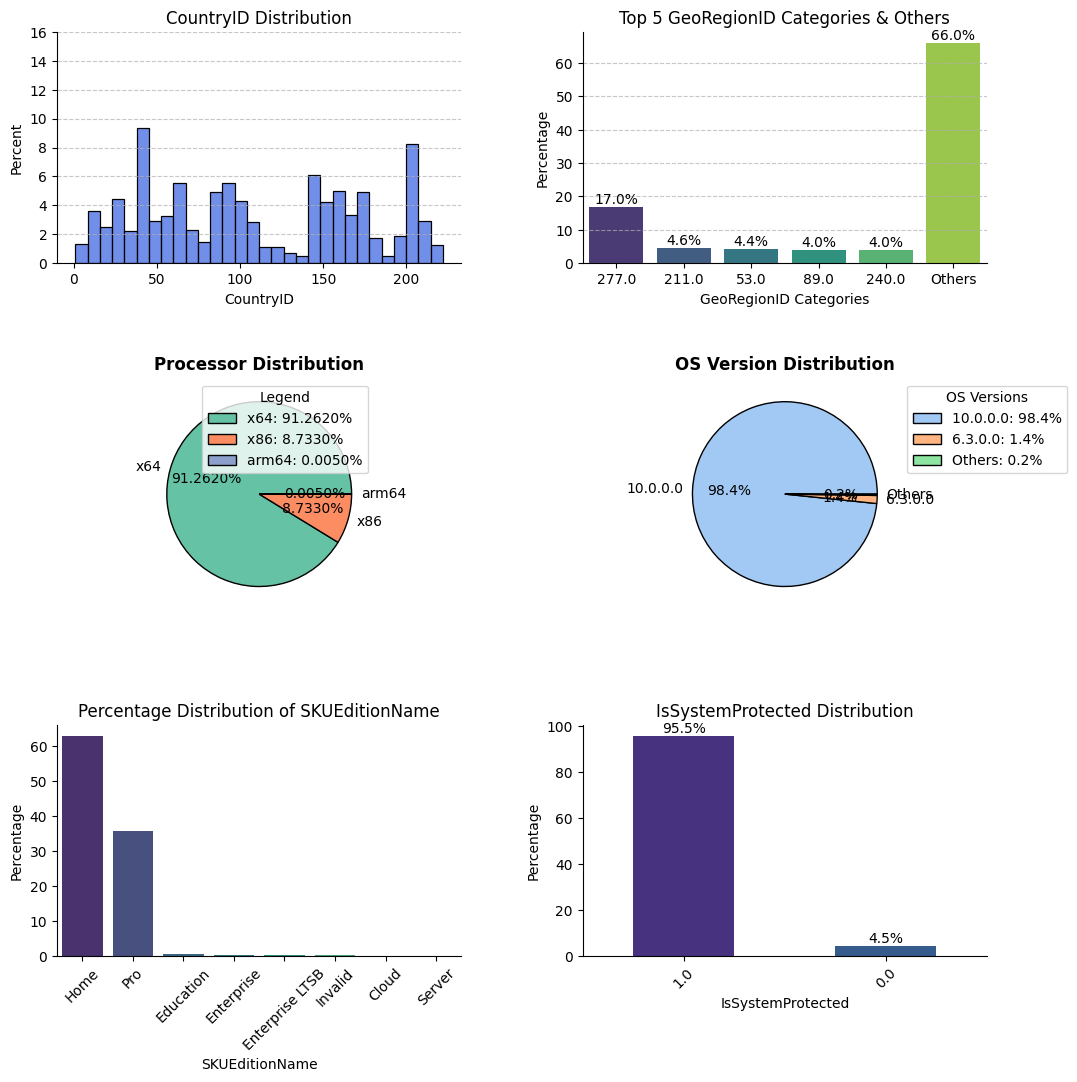

In [ ]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# CountryID histogram
sns.histplot(train_data['CountryID'], stat="percent", bins=30, color="royalblue", ax=axes[0, 0])
axes[0, 0].set_ylim(0, 16)
axes[0, 0].set_yticks(range(0, 17, 2))
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0, 0].set_title("CountryID Distribution")
sns.despine()

# GeoRegionID bar plot
counts = train_data['GeoRegionID'].value_counts(normalize=True) * 100
final_counts = pd.concat([counts.iloc[:5], pd.Series({'Others': counts.iloc[5:].sum()})])
ax = sns.barplot(x=final_counts.index, y=final_counts.values, palette="viridis", ax=axes[0, 1])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
axes[0, 1].set_xlabel("GeoRegionID Categories")
axes[0, 1].set_ylabel("Percentage")
axes[0, 1].set_title("Top 5 GeoRegionID Categories & Others")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

# Processor pie chart
counts = train_data['Processor'].value_counts(normalize=True) * 100
wedges, _, _ = axes[1, 0].pie(
    counts, labels=counts.index, autopct="%1.4f%%",
    colors=sns.color_palette("Set2"), wedgeprops={'edgecolor': 'black'})
axes[1, 0].legend(
    wedges, [f"{i}: {v:.4f}%" for i, v in counts.items()],
    title="Legend", loc="upper right")
axes[1, 0].set_title("Processor Distribution", fontweight='bold')

# OSVersion pie chart
counts = train_data['OSVersion'].value_counts(normalize=True) * 100
final_counts = pd.concat([counts.iloc[:2], pd.Series({'Others': counts.iloc[2:].sum()})])
wedges, _, _ = axes[1, 1].pie(final_counts, labels=final_counts.index, autopct="%1.1f%%",
                              colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
axes[1, 1].set_title("OS Version Distribution", fontweight='bold')
axes[1, 1].legend(wedges, [f'{label}: {percent:.1f}%' for label, percent in zip(final_counts.index, final_counts)],
                  title="OS Versions", loc="upper left", bbox_to_anchor=(1, 1))

# SKUEditionName bar chart
sku_counts = train_data['SKUEditionName'].value_counts(normalize=True) * 100
sns.barplot(x=sku_counts.index, y=sku_counts.values, palette="viridis", ax=axes[2, 0])
axes[2, 0].set_xlabel('SKUEditionName')
axes[2, 0].set_ylabel('Percentage')
axes[2, 0].set_title('Percentage Distribution of SKUEditionName')
axes[2, 0].tick_params(axis='x', rotation=45)

# IsSystemProtected bar chart
ax = (train_data['IsSystemProtected'].value_counts(normalize=True) * 100).plot(kind='bar', color=sns.color_palette("viridis"), ax=axes[2, 1])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
axes[2, 1].set_xlabel('IsSystemProtected')
axes[2, 1].set_ylabel('Percentage')
axes[2, 1].set_title('IsSystemProtected Distribution')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.show()

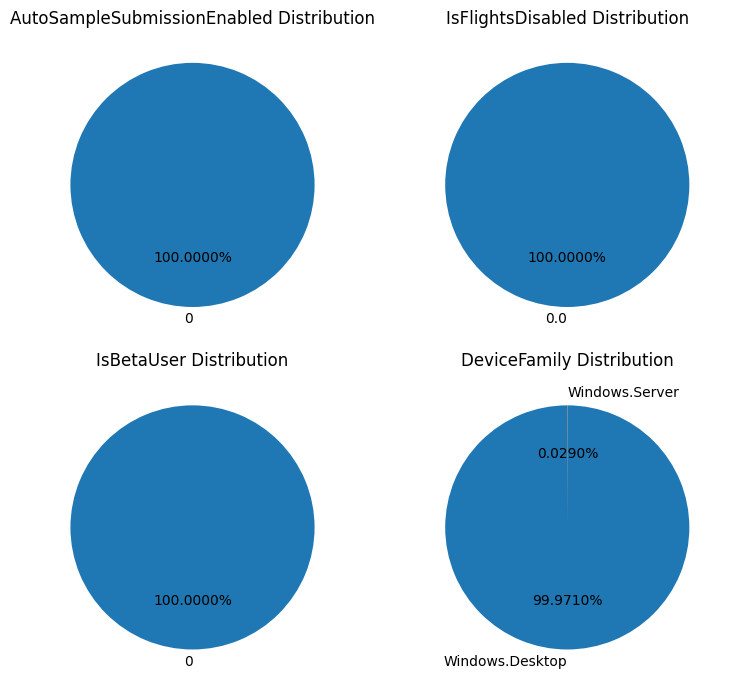

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

# AutoSampleSubmissionEnabled Pie Chart
counts = train_data['AutoSampleSubmissionEnabled'].value_counts(normalize=True) * 100
axes[0, 0].pie(counts, labels=counts.index, autopct='%1.4f%%', startangle=90)
axes[0, 0].set_title('AutoSampleSubmissionEnabled Distribution')

# IsFlightsDisabled Pie Chart
counts_flights = train_data['IsFlightsDisabled'].value_counts(normalize=True) * 100
axes[0, 1].pie(counts_flights, labels=counts_flights.index, autopct='%1.4f%%', startangle=90)
axes[0, 1].set_title('IsFlightsDisabled Distribution')

# IsBetaUser Pie Chart
counts_beta = train_data['IsBetaUser'].value_counts(normalize=True) * 100
axes[1, 0].pie(counts_beta, labels=counts_beta.index, autopct='%1.4f%%', startangle=90)
axes[1, 0].set_title('IsBetaUser Distribution')

# DeviceFamily Pie Chart (Now at the Last Position)
device_counts = train_data['DeviceFamily'].value_counts(normalize=True) * 100
axes[1, 1].pie(device_counts, labels=device_counts.index, autopct='%1.4f%%', startangle=90)
axes[1, 1].set_title('DeviceFamily Distribution')

plt.tight_layout()
plt.show()


As we can see that the first 3 graphs have only one value So we dont need that but the last one has 99.97% of one value and very little of second (around27) So that number is very little.

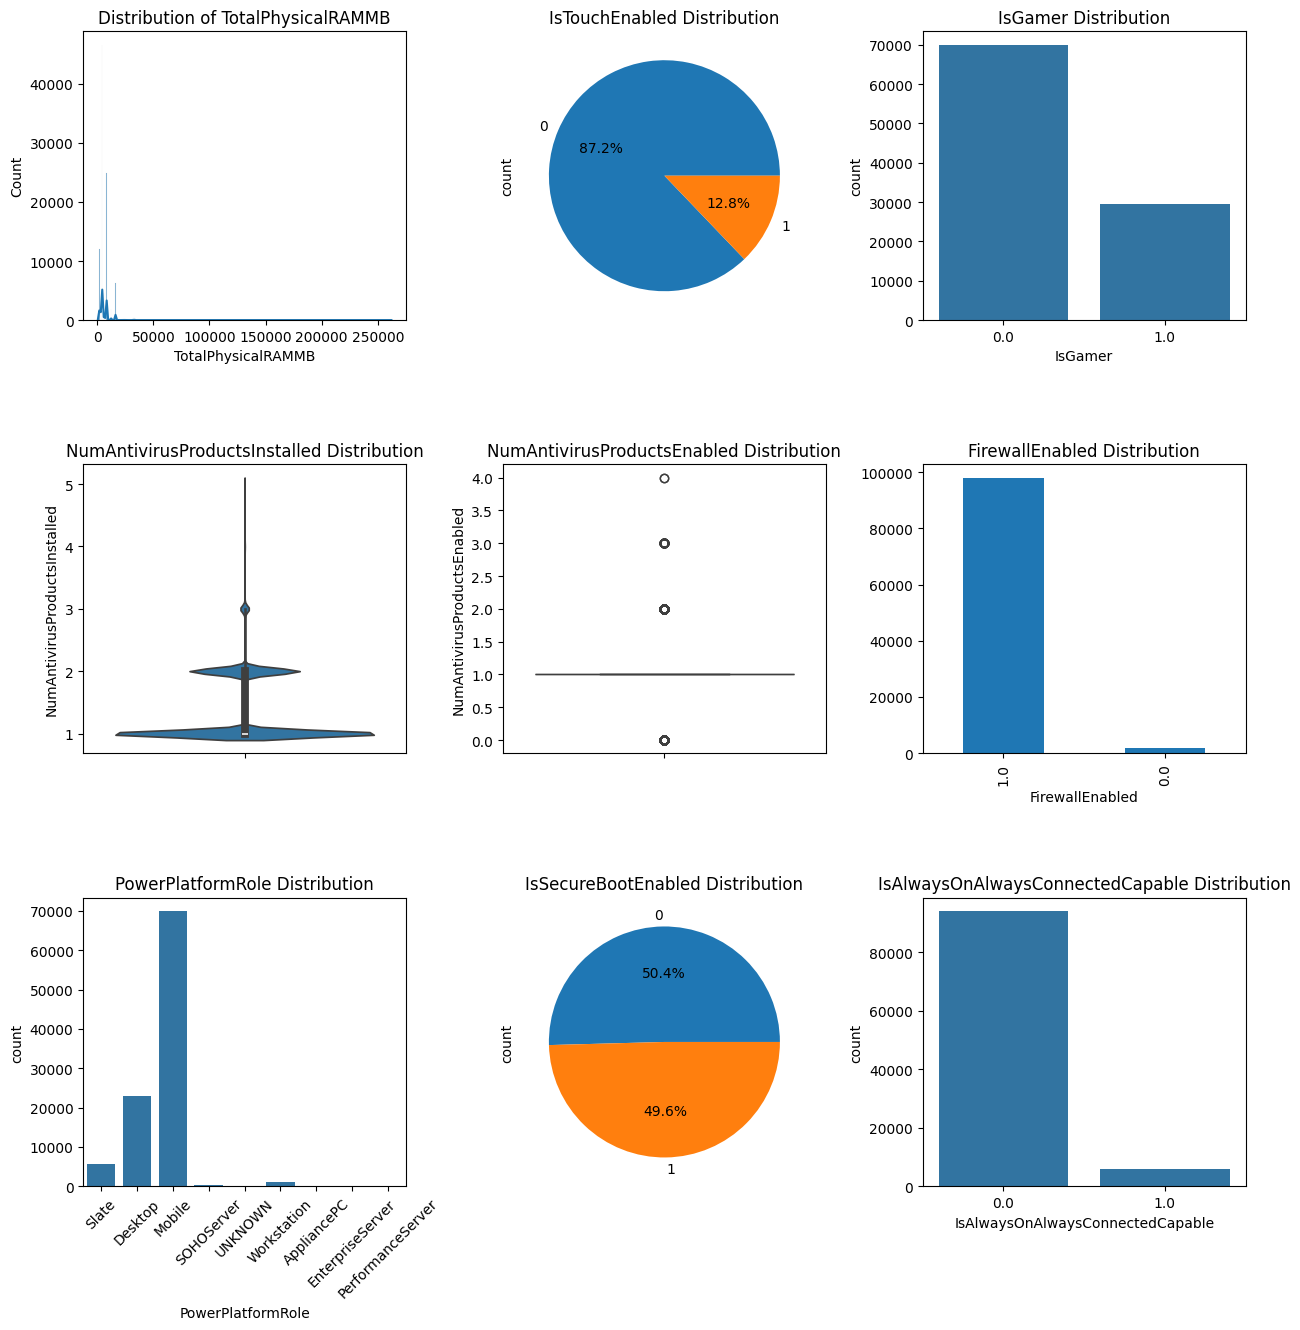

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# TotalPhysicalRAMMB
sns.histplot(train_data['TotalPhysicalRAMMB'], kde=True, ax=axes[0, 0])
axes[0,0].set_title('Distribution of TotalPhysicalRAMMB')

#IsTouchEnabled
train_data['IsTouchEnabled'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0,1])
axes[0,1].set_title('IsTouchEnabled Distribution')

#IsGamer
sns.countplot(x='IsGamer', data=train_data, ax=axes[0,2])
axes[0,2].set_title('IsGamer Distribution')


# NumAntivirusProductsInstalled
sns.violinplot(y='NumAntivirusProductsInstalled', data=train_data, ax=axes[1,0])
axes[1,0].set_title('NumAntivirusProductsInstalled Distribution')

#NumAntivirusProductsEnabled
sns.boxplot(y='NumAntivirusProductsEnabled', data=train_data, ax=axes[1,1])
axes[1,1].set_title('NumAntivirusProductsEnabled Distribution')

#FirewallEnabled
train_data['FirewallEnabled'].value_counts().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title("FirewallEnabled Distribution")

#PowerPlatformRole
sns.countplot(x='PowerPlatformRole', data=train_data, ax=axes[2,0])
axes[2,0].set_title('PowerPlatformRole Distribution')
axes[2,0].tick_params(axis='x', rotation=45)

#IsSecureBootEnabled
train_data['IsSecureBootEnabled'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2,1])
axes[2,1].set_title('IsSecureBootEnabled Distribution')


#IsAlwaysOnAlwaysConnectedCapable
sns.countplot(x='IsAlwaysOnAlwaysConnectedCapable', data=train_data, ax=axes[2,2])
axes[2,2].set_title('IsAlwaysOnAlwaysConnectedCapable Distribution')

plt.show()


# Pre-Processing

We are mapping win8defender to 1 and mse to 0. So we have numeric valule which will help us.

In [ ]:
train_data['ProductName'] = train_data['ProductName'].replace({'win8defender': 1, 'mse': 0})
train_data['DeviceFamily'] = train_data['DeviceFamily'].replace({'Windows.Server':0, 'Windows.Desktop':1})

Filling the blank values with 0

In [ ]:
columns_to_fill = [ 'NumAntivirusProductsEnabled', 'HasTpm', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID']
train_data[columns_to_fill] = train_data[columns_to_fill].fillna(0)

Reducing the number of categories witin the column

In [ ]:
train_data['PrimaryDiskType'] = train_data['PrimaryDiskType'].replace(['UNKNOWN','Unknown','Unspecified'], 'UNKNOWN')
train_data['PrimaryDiskType'] = train_data['PrimaryDiskType'].fillna('UNKNOWN')

#$$

In [ ]:
train_data = train_data.drop(columns= ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled','MachineID','CityID','OEMModelID','SystemVolumeCapacityMB','FirmwareVersionID','DeviceFamily'], errors='ignore')

In [ ]:
numeric_cols = train_data.select_dtypes(include=['int']).columns.tolist()
object_cols = train_data.select_dtypes(include=['object']).columns.tolist()
float_cols = train_data.select_dtypes(include=['float64']).columns.tolist()

print("\nNumeric columns:", len(numeric_cols), numeric_cols)
print("\nObject columns:", len(object_cols), object_cols)
print("\nFloat columns:", len(float_cols), float_cols)


Numeric columns: 16 ['ProductName', 'IsPassiveModeEnabled', 'HasTpm', 'CountryID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'HasOpticalDiskDrive', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSUILocaleID', 'IsPortableOS', 'IsSecureBootEnabled', 'IsTouchEnabled', 'IsPenCapable', 'target']

Object columns: 25 ['EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'DateAS', 'DateOS']

Float columns: 26 ['RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'GeoRegionID', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'Proce

Imputation with mode statergy

In [ ]:
train_data = train_data.replace({pd.NA: np.nan, '': np.nan, None: np.nan})
all_columns = {"numeric": numeric_cols, "object": object_cols, "float": float_cols}
mode_imputer = SimpleImputer(strategy='most_frequent')
for col_type, columns in all_columns.items():
    if columns:
        train_data[columns] = pd.DataFrame(
            mode_imputer.fit_transform(train_data[columns]),
            columns=columns,
            index=train_data.index
        )

Confirming imputation

In [ ]:
for col in all_columns["numeric"]:
    train_data[col] = train_data[col].astype(int)
for col in all_columns["float"]:
    train_data[col] = train_data[col].astype(float)
for col in all_columns["object"]:
    train_data[col] = train_data[col].astype(str)


print(train_data.isnull().sum())

ProductName                           0
EngineVersion                         0
AppVersion                            0
SignatureVersion                      0
RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
GeoRegionID                           0
LocaleEnglishNameID                   0
PlatformType                          0
Processor                             0
OSVersion                             0
OSBuildNumber                         0
OSProductSuite                        0
OsPlatformSubRelease                  0
OSBuildLab                            0
SKUEditionName                        0
IsSystemProtected                     0
SMode                                 0
IEVersionID                           0
FirewallEnabled                       0


Converting the int datatype into float datatype.

In [ ]:
# Select all int64 columns
int_cols = train_data.select_dtypes(include=['int64','float64']).columns.tolist()

# Convert int64 columns to float64
for col in int_cols:
    train_data[col] = train_data[col].astype('float64')

# Print the updated info
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 67 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ProductName                         100000 non-null  float64
 1   EngineVersion                       100000 non-null  object 
 2   AppVersion                          100000 non-null  object 
 3   SignatureVersion                    100000 non-null  object 
 4   RealTimeProtectionState             100000 non-null  float64
 5   IsPassiveModeEnabled                100000 non-null  float64
 6   AntivirusConfigID                   100000 non-null  float64
 7   NumAntivirusProductsInstalled       100000 non-null  float64
 8   NumAntivirusProductsEnabled         100000 non-null  float64
 9   HasTpm                              100000 non-null  float64
 10  CountryID                           100000 non-null  float64
 11  GeoRegionID                

Finding the correlation of all the columns with the target. We will only select the top columns which has the correlation very high

In [ ]:
correlations = {}
float_cols = train_data.select_dtypes(include=['int64','float']).columns.tolist()

# Iterate through int64 columns (excluding 'target') and calculate the correlation with 'target'
for col in float_cols:
    if col != 'target':
        correlation = train_data[col].corr(train_data['target'])
        correlations[col] = abs(correlation)  # Take absolute value
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))

for col, corr in sorted_correlations.items():
    print(f"Correlation between '{col}' and 'target': {corr}")

Correlation between 'NumAntivirusProductsInstalled' and 'target': 0.15112661954826917
Correlation between 'AntivirusConfigID' and 'target': 0.11814587405377451
Correlation between 'TotalPhysicalRAMMB' and 'target': 0.06568266537530583
Correlation between 'IsAlwaysOnAlwaysConnectedCapable' and 'target': 0.06474655260779519
Correlation between 'IsSystemProtected' and 'target': 0.06231802390060379
Correlation between 'IsGamer' and 'target': 0.06090142129232548
Correlation between 'ProcessorCoreCount' and 'target': 0.05656988856327451
Correlation between 'PrimaryDiskCapacityMB' and 'target': 0.04908678016770174
Correlation between 'RealTimeProtectionState' and 'target': 0.04897668399321169
Correlation between 'IsTouchEnabled' and 'target': 0.04614230100840552
Correlation between 'IsPassiveModeEnabled' and 'target': 0.04199661646513612
Correlation between 'IsVirtualDevice' and 'target': 0.039781886788428714
Correlation between 'NumAntivirusProductsEnabled' and 'target': 0.03913854050297291


This is a coorelation matrix which signnifies the coorelation with the target

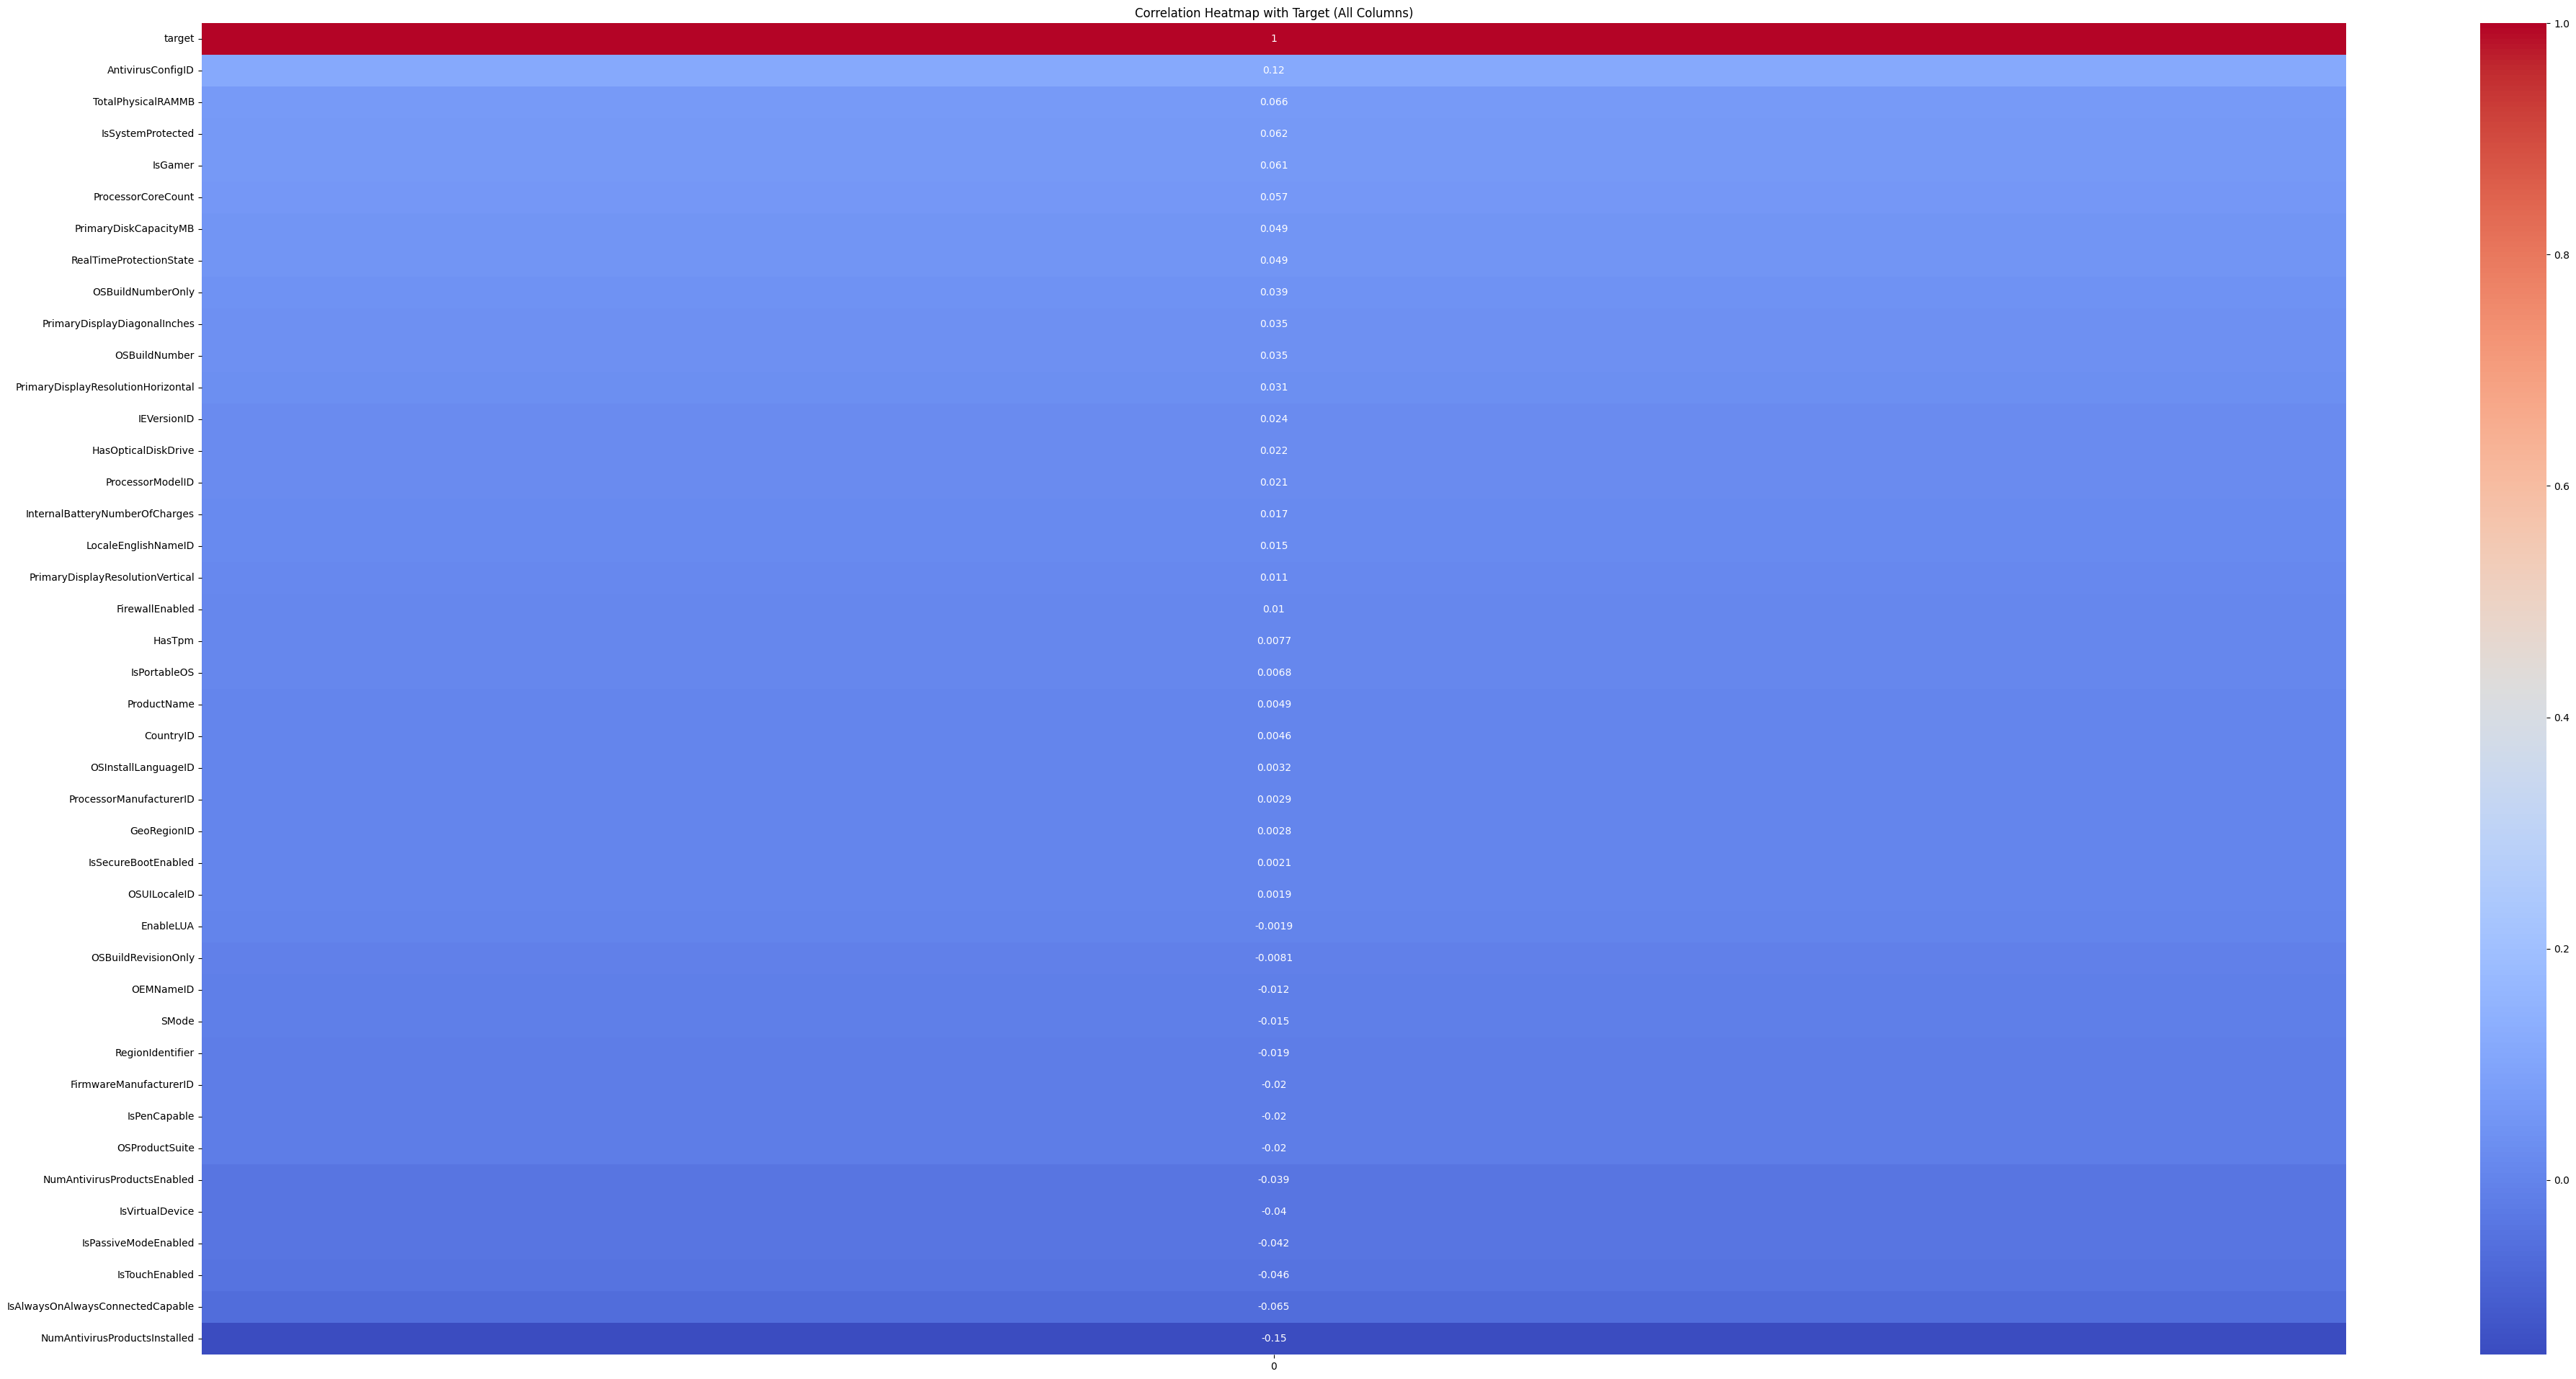

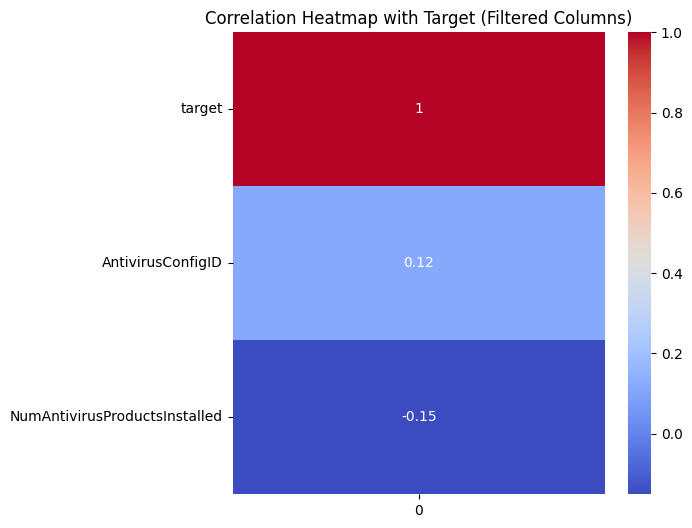

In [ ]:
correlation_matrix = train_data[int_cols].corrwith(train_data['target'])

# Create the first heatmap
plt.figure(figsize=(48,24))
sns.heatmap(pd.DataFrame(correlation_matrix).sort_values(by=0, ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Target (All Columns)')
plt.show()


threshold = 0.1
filtered_columns = [col for col, corr in correlation_matrix.items() if abs(corr) >= threshold]


# Calculate the correlation matrix for filtered columns
filtered_correlation_matrix = train_data[filtered_columns].corrwith(train_data['target'])

# Create the second heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(filtered_correlation_matrix).sort_values(by=0, ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Target (Filtered Columns)')
plt.show()



This Heat map states the coorelation among the columns

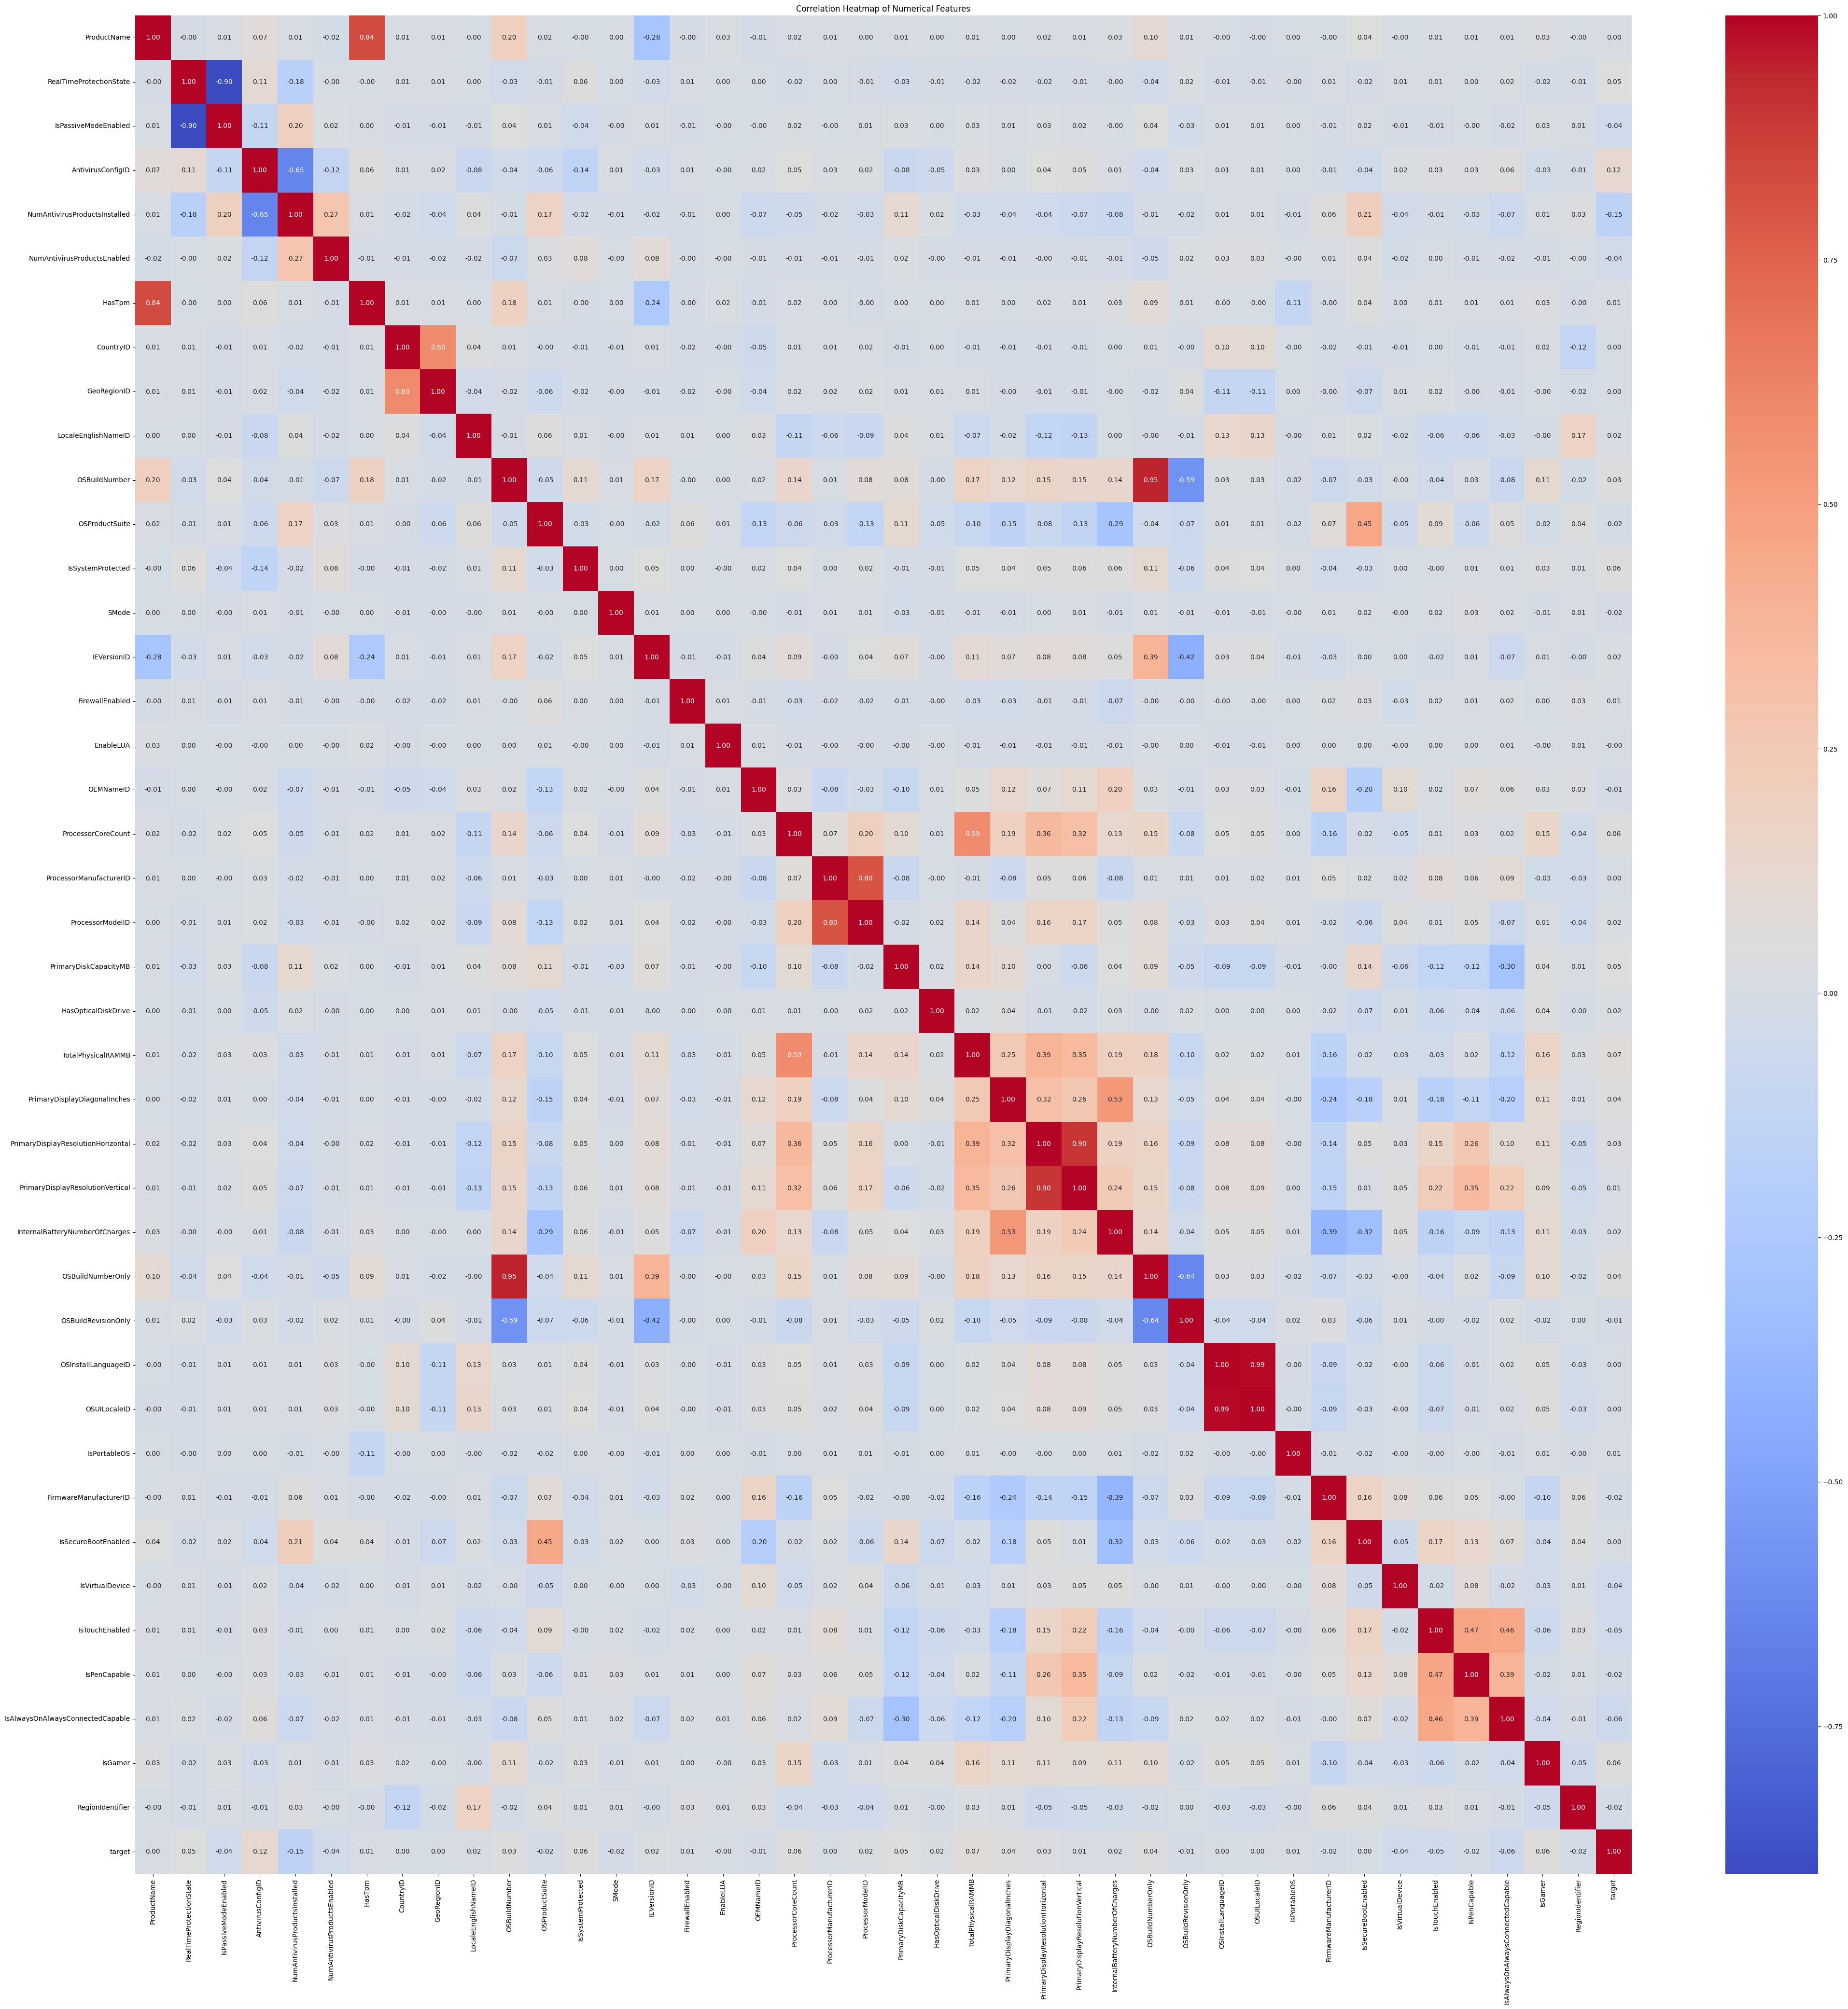

In [ ]:
correlation_matrix = train_data[int_cols].corr()
# Create the heatmap
plt.figure(figsize=(50, 50))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

We will select the top 7 features as they have the highest correlation

In [ ]:
top_7_columns = list(sorted_correlations.keys())[:7]
top_7_columns

['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount']

We will se the coorelation of the object columns with the target

In [ ]:
correlation_results = {}

# Iterate through object columns and calculate the relationship with 'target'
for col in object_cols:
    if col != 'target':
        # Group by the object column and calculate the mean of the target variable for each group
        relationship = train_data.groupby(col)['target'].mean()

        # Store the correlation results in the dictionary
        correlation_results[col] = relationship

# Sort all features by their correlation (standard deviation)
all_object_features = sorted(correlation_results.items(), key=lambda x: x[1].std(), reverse=True)

# Print all correlations
for feature, correlation in all_object_features:
    print(f"Feature: {feature}, Correlation: {correlation.std()}")

Feature: OSVersion, Correlation: 0.3762530804643262
Feature: SignatureVersion, Correlation: 0.3007191744051245
Feature: DateAS, Correlation: 0.30021787979218223
Feature: OSEdition, Correlation: 0.2672813542078498
Feature: OSBuildLab, Correlation: 0.26487522027811233
Feature: OSSkuFriendlyName, Correlation: 0.25284281580355317
Feature: PowerPlatformRole, Correlation: 0.21300393541687782
Feature: AppVersion, Correlation: 0.20947959651458817
Feature: NumericOSVersion, Correlation: 0.19302564451467788
Feature: ChassisType, Correlation: 0.18685748118627132
Feature: OSArchitecture, Correlation: 0.15915074665989765
Feature: Processor, Correlation: 0.15915029042516268
Feature: EngineVersion, Correlation: 0.1546545109270554
Feature: LicenseActivationChannel, Correlation: 0.1539970277622421
Feature: DateOS, Correlation: 0.1525608118843421
Feature: SKUEditionName, Correlation: 0.12831866129408556
Feature: MDC2FormFactor, Correlation: 0.12419513532657754
Feature: PlatformType, Correlation: 0.10940

Object columns has more correlation compared to numeric columns. So we will select more Object columns.

Now we will select the top 19 features (7 numeric and 12 object) which have the highest correlation and we will train the model with these only.

In [ ]:

top_numeric_features = list(sorted_correlations.keys())[:7]
top_object_features = [feature for feature, correlation in all_object_features[:12]]

top_19_features = top_numeric_features + top_object_features
top_19_features


['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount',
 'OSVersion',
 'SignatureVersion',
 'DateAS',
 'OSEdition',
 'OSBuildLab',
 'OSSkuFriendlyName',
 'PowerPlatformRole',
 'AppVersion',
 'NumericOSVersion',
 'ChassisType',
 'OSArchitecture',
 'Processor']

In [ ]:
top_object_features

['OSVersion',
 'SignatureVersion',
 'DateAS',
 'OSEdition',
 'OSBuildLab',
 'OSSkuFriendlyName',
 'PowerPlatformRole',
 'AppVersion',
 'NumericOSVersion',
 'ChassisType',
 'OSArchitecture',
 'Processor']

In [ ]:
top_numeric_features

['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount']

After adding target out data now consist of 20 columns. we added the targer here but in test dataset we will not have target column as it is what we will predict.

In [ ]:
top_numeric_features = ['NumAntivirusProductsInstalled','AntivirusConfigID','TotalPhysicalRAMMB','IsAlwaysOnAlwaysConnectedCapable','IsSystemProtected','IsGamer','ProcessorCoreCount','target']
top_object_features = ['OSVersion','SignatureVersion','DateAS','OSEdition','OSBuildLab','OSSkuFriendlyName','PowerPlatformRole','AppVersion','NumericOSVersion','ChassisType','OSArchitecture','Processor']

# Combine the numerical and categorical columns into a single list
selected_columns = top_numeric_features + top_object_features

# Select only the specified columns and drop all others
train_data = train_data[selected_columns]

# Verify the resulting DataFrame
print("Columns remaining in the DataFrame:", train_data.columns.tolist())
print(len(train_data.columns))

Columns remaining in the DataFrame: ['NumAntivirusProductsInstalled', 'AntivirusConfigID', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable', 'IsSystemProtected', 'IsGamer', 'ProcessorCoreCount', 'target', 'OSVersion', 'SignatureVersion', 'DateAS', 'OSEdition', 'OSBuildLab', 'OSSkuFriendlyName', 'PowerPlatformRole', 'AppVersion', 'NumericOSVersion', 'ChassisType', 'OSArchitecture', 'Processor']
20


# Train-Test Split

---



We are spiting the training and validation set into 80:20 ratio.

In [ ]:
y= train_data.target.copy()
x= train_data.drop('target', axis=1).copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(80000, 19)

# Pipeline

In [ ]:
from sklearn.compose import make_column_selector as mcs
num_sel = mcs(dtype_exclude='object')
cat_sel = mcs(dtype_include='object')

numerical - Standard Scalar


Categorical - OrdinalEncoder

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Create numerical and categorical pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', num_pipeline, num_sel(X_train)),
    ('categorical', cat_pipeline, cat_sel(X_train))
])

# Create the final pipeline
pipe = Pipeline([('preprocessor', preprocessor)])

# Fit the pipeline
pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NumAntivirusProductsInstalled',
                                                   'AntivirusConfigID',
                                                   'TotalPhysicalRAMMB',
                                                   'IsAlwaysOnAlwaysConnectedCapable',
                                                   'IsSystemProtected',
                                                   'IsGamer',
                                                   'ProcessorCoreCount']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['OSVersion',
                                                   'SignatureVersion', 'DateAS',
                                                   'OSEdition', 'OSBuildLab',
                                                   'OSSkuFriendlyName',
                                                   'PowerPlatformRole',
                                                   'AppVersion',
                                                   'NumericOSVersion',
                                                   'ChassisType',
                                                   'OSArchitecture',
                                                   'Processor'])]))])

In [ ]:
X_train_trf = pipe.transform(X_train)
X_val_trf = pipe.transform(X_val)

In [ ]:
X_train_trf.shape

(80000, 19)

# Selector : Recurssive Feature Extraction

Feature Selection technique

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Create and fit the RFE selector
estimator = LogisticRegression(max_iter=10000)
selector = RFE(estimator, n_features_to_select=18, step=1)
selector = selector.fit(X_train_trf, y_train)

# Get the selected features
selected_features = selector.support_

# Transform the data to include only selected features
X_train_selected = X_train_trf[:, selected_features]
X_val_selected = X_val_trf[:, selected_features]

# Print the selected feature indices
print("Selected feature indices:", np.where(selected_features)[0])

# If you want to get the names of the selected features:
feature_names = pipe.get_feature_names_out()
selected_feature_names = feature_names[selected_features]
print("Selected feature names:", selected_feature_names)

Selected feature indices: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18]
Selected feature names: ['numerical__NumAntivirusProductsInstalled' 'numerical__AntivirusConfigID'
 'numerical__TotalPhysicalRAMMB'
 'numerical__IsAlwaysOnAlwaysConnectedCapable'
 'numerical__IsSystemProtected' 'numerical__IsGamer'
 'numerical__ProcessorCoreCount' 'categorical__OSVersion'
 'categorical__SignatureVersion' 'categorical__OSEdition'
 'categorical__OSBuildLab' 'categorical__OSSkuFriendlyName'
 'categorical__PowerPlatformRole' 'categorical__AppVersion'
 'categorical__NumericOSVersion' 'categorical__ChassisType'
 'categorical__OSArchitecture' 'categorical__Processor']


In [ ]:
# Apply DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train_selected, y_train)

# Make predictions on validation set
y_pred = dc.predict(X_val_selected)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"DummyClassifier Accuracy: {accuracy:.4f}")

DummyClassifier Accuracy: 0.5016


In [ ]:
# prompt: Create a Light GBM model

import lightgbm as lgb

# Create LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Train the model
lgb_clf.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_lgb = lgb_clf.predict(X_val_selected)

# Evaluate the model
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")

print(classification_report(y_val, y_pred_lgb))


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651
LightGBM Accuracy: 0.6139
              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58      9968
         1.0       0.60      0.69      0.64     10032

    accuracy                           0.61     20000
   macro avg       0.62      0.61      0.61     20000
weighted avg       0.62      0.61      0.61     20000



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1) # You can change the kernel and C value

# Train the classifier
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_svm = svm_classifier.predict(X_val_selected)

# Evaluate the model
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

print(classification_report(y_val, y_pred_svm))


SVM Accuracy: 0.5550
              precision    recall  f1-score   support

         0.0       0.54      0.66      0.60      9968
         1.0       0.57      0.45      0.50     10032

    accuracy                           0.55     20000
   macro avg       0.56      0.56      0.55     20000
weighted avg       0.56      0.55      0.55     20000



SVM gave the accuracy of 0.55

# XGB Boost

In [ ]:
import optuna
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_trf, y_train)
xgb_pred = xgb_clf.predict(X_val_trf)
xgb_accuracy = accuracy_score(y_val, xgb_pred)
print(f"XGB Classifier Accuracy: {xgb_accuracy}")
print(classification_report(y_val, xgb_pred))

XGB Classifier Accuracy: 0.6093
              precision    recall  f1-score   support

         0.0       0.63      0.54      0.58      9968
         1.0       0.60      0.68      0.64     10032

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



In [ ]:
'''
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val_selected)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print(classification_report(y_val, y_pred_xgb))
'''

'\nxgb_model = xgb.XGBClassifier(objective=\'binary:logistic\', random_state=42)\nxgb_model.fit(X_train_selected, y_train)\n\n# Make predictions on the validation set\ny_pred_xgb = xgb_model.predict(X_val_selected)\n\n# Evaluate the model\naccuracy_xgb = accuracy_score(y_val, y_pred_xgb)\nprint(f"XGBoost Accuracy: {accuracy_xgb:.4f}")\n\nprint(classification_report(y_val, y_pred_xgb))\n'

XGB Boost gave the highest accuracy of 0.6086

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

# Create and train the SGD classifier
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42)
sgd_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred_sgd = sgd_classifier.predict(X_val_selected)

# Evaluate the model
accuracy_sgd = accuracy_score(y_val, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd:.4f}")

print(classification_report(y_val, y_pred_sgd))


SGD Classifier Accuracy: 0.5108
              precision    recall  f1-score   support

         0.0       0.72      0.03      0.06      9968
         1.0       0.51      0.99      0.67     10032

    accuracy                           0.51     20000
   macro avg       0.61      0.51      0.36     20000
weighted avg       0.61      0.51      0.36     20000



SGD Classifier gave the accuracy of 0.51

# Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on validation set
y_pred = rf_classifier.predict(X_val_selected)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Random Forest Classifier Accuracy: 0.5738

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.57      9968
         1.0       0.58      0.57      0.57     10032

    accuracy                           0.57     20000
   macro avg       0.57      0.57      0.57     20000
weighted avg       0.57      0.57      0.57     20000



Random forest gave the accuracy of 0.57

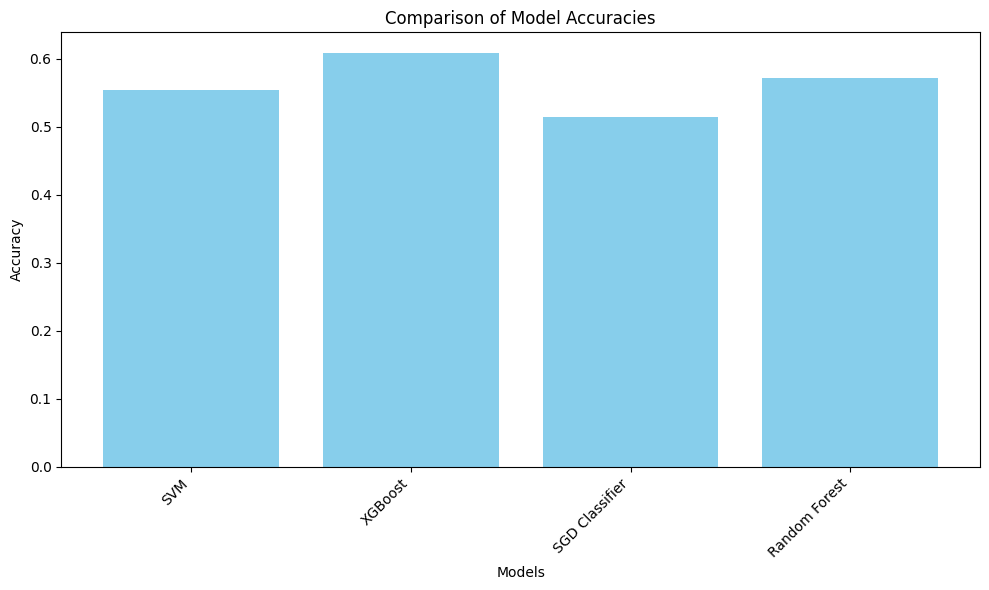

In [ ]:
import matplotlib.pyplot as plt

accuracy_scores = {
    'SVM': 0.5543,
    'XGBoost': 0.6086,
    'SGD Classifier': 0.5143,
    'Random Forest': 0.5714
}

# Extract model names and accuracy scores
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

Working on Test Data

In [ ]:
warnings.filterwarnings("ignore")
test_data['ProductName'] = test_data['ProductName'].replace({'win8defender': 1, 'mse': 0})
test_data['DeviceFamily'] = test_data['DeviceFamily'].replace({'Windows.Server':0, 'Windows.Desktop':1})
columns_to_fill = [ 'NumAntivirusProductsEnabled', 'HasTpm', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID']
test_data[columns_to_fill] = test_data[columns_to_fill].fillna(0)

In [ ]:
numeric_cols = test_data.select_dtypes(include=['int']).columns.tolist()
object_cols = test_data.select_dtypes(include=['object']).columns.tolist()
float_cols = test_data.select_dtypes(include=['float64']).columns.tolist()

print("\nNumeric columns:", len(numeric_cols), numeric_cols)
print("\nObject columns:", len(object_cols), object_cols)
print("\nFloat columns:", len(float_cols), float_cols)


Numeric columns: 18 ['ProductName', 'IsBetaUser', 'IsPassiveModeEnabled', 'HasTpm', 'CountryID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'AutoSampleSubmissionEnabled', 'DeviceFamily', 'HasOpticalDiskDrive', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSUILocaleID', 'IsPortableOS', 'IsSecureBootEnabled', 'IsTouchEnabled', 'IsPenCapable']

Object columns: 26 ['MachineID', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'DateAS', 'DateOS']

Float columns: 31 ['RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'CityID', 'GeoRegionID', 'IsSystemProtected', '

Imputation using mode

In [ ]:
test_data = test_data.replace({pd.NA: np.nan, '': np.nan, None: np.nan})
all_columns = {"numeric": numeric_cols, "object": object_cols, "float": float_cols}
mode_imputer = SimpleImputer(strategy='most_frequent')
for col_type, columns in all_columns.items():
    if columns:  # Ensure there are columns to process
        test_data[columns] = pd.DataFrame(
            mode_imputer.fit_transform(test_data[columns]),
            columns=columns,
            index=test_data.index
        )

Confirming the imputation

In [ ]:
for col in all_columns["numeric"]:
    test_data[col] = test_data[col].astype(int)
for col in all_columns["float"]:
    test_data[col] = test_data[col].astype(float)
for col in all_columns["object"]:
    test_data[col] = test_data[col].astype(str)


print(train_data.isnull().sum())

NumAntivirusProductsInstalled       0
AntivirusConfigID                   0
TotalPhysicalRAMMB                  0
IsAlwaysOnAlwaysConnectedCapable    0
IsSystemProtected                   0
IsGamer                             0
ProcessorCoreCount                  0
target                              0
OSVersion                           0
SignatureVersion                    0
DateAS                              0
OSEdition                           0
OSBuildLab                          0
OSSkuFriendlyName                   0
PowerPlatformRole                   0
AppVersion                          0
NumericOSVersion                    0
ChassisType                         0
OSArchitecture                      0
Processor                           0
dtype: int64


Selecting the top features which has the highest correlation. But this time we did not select the target as that is what we will predict.

In [ ]:
top_numeric_features = ['NumAntivirusProductsInstalled','AntivirusConfigID','TotalPhysicalRAMMB','IsAlwaysOnAlwaysConnectedCapable','IsSystemProtected','IsGamer','ProcessorCoreCount']
top_object_features = ['OSVersion','SignatureVersion','DateAS','OSEdition','OSBuildLab','OSSkuFriendlyName','PowerPlatformRole','AppVersion','NumericOSVersion','ChassisType','OSArchitecture','Processor']
# Combine the numerical and categorical columns into a single list
selected_columns = top_numeric_features + top_object_features

# Select only the specified columns and drop all others
test_data = test_data[selected_columns]

# Verify the resulting DataFrame
print("Columns remaining in the DataFrame:", test_data.columns.tolist())
print(len(test_data.columns))

Columns remaining in the DataFrame: ['NumAntivirusProductsInstalled', 'AntivirusConfigID', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable', 'IsSystemProtected', 'IsGamer', 'ProcessorCoreCount', 'OSVersion', 'SignatureVersion', 'DateAS', 'OSEdition', 'OSBuildLab', 'OSSkuFriendlyName', 'PowerPlatformRole', 'AppVersion', 'NumericOSVersion', 'ChassisType', 'OSArchitecture', 'Processor']
19


# Tuning Random Forest

In [ ]:
import numpy as np
import optuna
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Assuming you have already done the imputation and have X_train_trf, y_train, X_val_trf, y_val, and test_df

# Step 1: RFE Feature Selection
estimator = LogisticRegression(max_iter=10000)
selector = RFE(estimator, n_features_to_select=18, step=1)
selector = selector.fit(X_train_trf, y_train)

# Get the selected features
selected_features = selector.support_

# Transform the data to include only selected features
X_train_selected = X_train_trf[:, selected_features]
X_val_selected = X_val_trf[:, selected_features]

# Print the selected feature names
feature_names = pipe.get_feature_names_out()
selected_feature_names = feature_names[selected_features]
print("Selected feature names:", selected_feature_names)

# Step 2: Define Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    }

    rf_model = RandomForestClassifier(**params, random_state=42)
    return cross_val_score(rf_model, X_train_selected, y_train, cv=3, scoring='accuracy').mean()

# Step 3: Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Step 4: Train final model with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_selected, y_train)

# Step 5: Evaluate on validation set
y_val_pred = best_model.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Tuned Random Forest Classifier Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))


In [ ]:
'''
import optuna
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train_trf, y_train)
xgb_pred = xgb_clf.predict(X_val_trf)
xgb_accuracy = accuracy_score(y_val, xgb_pred)
print(f"XGB Classifier Accuracy: {xgb_accuracy}")
print(classification_report(y_val, xgb_pred))
'''

In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

def objective(trial):
    # Define the hyperparameter search space
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
    }

    # Train the XGBoost model
    model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **params)
    model.fit(X_train_trf, y_train)

    # Predict and evaluate accuracy on validation set
    y_pred = model.predict(X_val_trf)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train the best model on the full training data
best_params = study.best_params
best_model_XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **best_params)
best_model_XGB.fit(X_train_trf, y_train)

# Evaluate on the validation set
y_pred = best_model_XGB.predict(X_val_trf)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, xgb_pred))

ModuleNotFoundError: No module named 'optuna'

In [ ]:
'''
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    xgb_model = XGBClassifier(**params, random_state=42, use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in skf.split(X_train_selected, y_train):
        X_train_fold, X_val_fold = X_train_selected[train_idx], X_train_selected[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        xgb_model.fit(X_train_fold, y_train_fold)
        scores.append(xgb_model.score(X_val_fold, y_val_fold))

    return np.mean(scores)

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print final results
print("=" * 50)
print(f"Number of trials completed: {len(study.trials)}")
print(f"Best Score Achieved: {study.best_value:.4f}")
print("Best Parameters:", study.best_trial.params)
print("=" * 50)

# Train final model with best hyperparameters
best_params = study.best_trial.params
best_xgb_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False)
best_xgb_model.fit(X_train_selected, y_train)

# Make predictions on validation set
y_pred_best_xgb = best_xgb_model.predict(X_val_selected)

# Evaluate final model
final_accuracy = accuracy_score(y_val, y_pred_best_xgb)
print(f"\nFinal Model Accuracy on Validation Set: {final_accuracy:.4f}")
'''


In [ ]:
# prompt: Tune Light BGM model also import the necessary libraries

# Assuming X_train_selected, y_train, X_val_selected, y_val are already defined from previous code

import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import optuna

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
        'num_leaves': trial.suggest_int('num_leaves', 31, 127),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),  # L1 regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1)   # L2 regularization
    }

    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

print("Best hyperparameters:", study.best_params)
best_lgb_model = lgb.LGBMClassifier(**study.best_params, random_state=42)
best_lgb_model.fit(X_train_selected, y_train)

y_pred = best_lgb_model.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
print(f"Tuned LightGBM Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))


[I 2025-02-24 18:07:23,663] A new study created in memory with name: no-name-aca23969-362a-4592-afb0-dd98cff67153


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:27,830] Trial 0 finished with value: 0.5997 and parameters: {'num_leaves': 125, 'learning_rate': 0.27949113193988623, 'n_estimators': 192, 'subsample': 0.9939641173024296, 'colsample_bytree': 0.8502619863658503, 'reg_alpha': 0.9283604997575388, 'reg_lambda': 0.4894499449470858}. Best is trial 0 with value: 0.5997.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:28,944] Trial 1 finished with value: 0.61095 and parameters: {'num_leaves': 64, 'learning_rate': 0.25641795146634117, 'n_estimators': 68, 'subsample': 0.717983149693487, 'colsample_bytree': 0.7982744654519793, 'reg_alpha': 0.6408969728099964, 'reg_lambda': 0.4827373312814609}. Best is trial 1 with value: 0.61095.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:32,469] Trial 2 finished with value: 0.60915 and parameters: {'num_leaves': 64, 'learning_rate': 0.26609336821838486, 'n_estimators': 178, 'subsample': 0.6812580013158358, 'colsample_bytree': 0.7184694765924421, 'reg_alpha': 0.7768043921348906, 'reg_lambda': 0.9905194609657149}. Best is trial 1 with value: 0.61095.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:35,681] Trial 3 finished with value: 0.61115 and parameters: {'num_leaves': 76, 'learning_rate': 0.26653605530797203, 'n_estimators': 180, 'subsample': 0.6639604771836525, 'colsample_bytree': 0.5660154075949564, 'reg_alpha': 0.768494544188657, 'reg_lambda': 0.17443984557523118}. Best is trial 3 with value: 0.61115.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:37,080] Trial 4 finished with value: 0.61085 and parameters: {'num_leaves': 60, 'learning_rate': 0.28546916977515907, 'n_estimators': 159, 'subsample': 0.9029740804996251, 'colsample_bytree': 0.8587496213462396, 'reg_alpha': 0.7278285572209591, 'reg_lambda': 0.8667230542892539}. Best is trial 3 with value: 0.61115.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:39,931] Trial 5 finished with value: 0.6 and parameters: {'num_leaves': 123, 'learning_rate': 0.21947871051443235, 'n_estimators': 194, 'subsample': 0.6149099581730928, 'colsample_bytree': 0.8043717756459647, 'reg_alpha': 0.5123206129225492, 'reg_lambda': 0.389753530151011}. Best is trial 3 with value: 0.61115.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:41,379] Trial 6 finished with value: 0.6081 and parameters: {'num_leaves': 119, 'learning_rate': 0.20280999075520315, 'n_estimators': 121, 'subsample': 0.5819415097191245, 'colsample_bytree': 0.8610971679122181, 'reg_alpha': 0.8280367649799144, 'reg_lambda': 0.6241296918427438}. Best is trial 3 with value: 0.61115.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:42,783] Trial 7 finished with value: 0.61635 and parameters: {'num_leaves': 56, 'learning_rate': 0.07164446872556919, 'n_estimators': 113, 'subsample': 0.7840798800013116, 'colsample_bytree': 0.6733920930501576, 'reg_alpha': 0.7214719795520406, 'reg_lambda': 0.39299080320452673}. Best is trial 7 with value: 0.61635.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:44,662] Trial 8 finished with value: 0.6173 and parameters: {'num_leaves': 95, 'learning_rate': 0.07052708237393424, 'n_estimators': 131, 'subsample': 0.6469013129145198, 'colsample_bytree': 0.5536763910340008, 'reg_alpha': 0.7993914157039436, 'reg_lambda': 0.7677806530933516}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:46,490] Trial 9 finished with value: 0.6121 and parameters: {'num_leaves': 120, 'learning_rate': 0.09983310974096515, 'n_estimators': 165, 'subsample': 0.6753322280716301, 'colsample_bytree': 0.7412493615353919, 'reg_alpha': 0.1510941000219549, 'reg_lambda': 0.35459915802284225}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:47,588] Trial 10 finished with value: 0.6093 and parameters: {'num_leaves': 33, 'learning_rate': 0.027112501833260756, 'n_estimators': 88, 'subsample': 0.5058792238082443, 'colsample_bytree': 0.9920410569992125, 'reg_alpha': 0.22716519602223284, 'reg_lambda': 0.724166150964816}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:49,329] Trial 11 finished with value: 0.6168 and parameters: {'num_leaves': 94, 'learning_rate': 0.08648930859064359, 'n_estimators': 122, 'subsample': 0.8263296931674254, 'colsample_bytree': 0.5382268378529302, 'reg_alpha': 0.9908647851945183, 'reg_lambda': 0.0810162551068132}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:51,695] Trial 12 finished with value: 0.6156 and parameters: {'num_leaves': 97, 'learning_rate': 0.12795508753374338, 'n_estimators': 139, 'subsample': 0.813096343332029, 'colsample_bytree': 0.51672680931924, 'reg_alpha': 0.967288994718592, 'reg_lambda': 0.03166412551773549}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:53,701] Trial 13 finished with value: 0.61685 and parameters: {'num_leaves': 97, 'learning_rate': 0.049114022064435124, 'n_estimators': 97, 'subsample': 0.8487872661408755, 'colsample_bytree': 0.6119776856832712, 'reg_alpha': 0.9943890739618614, 'reg_lambda': 0.7162275804390069}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:55,251] Trial 14 finished with value: 0.61215 and parameters: {'num_leaves': 99, 'learning_rate': 0.011942805835085307, 'n_estimators': 88, 'subsample': 0.9077286529158386, 'colsample_bytree': 0.6288499961255865, 'reg_alpha': 0.3205112994965277, 'reg_lambda': 0.7120592483231799}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:56,839] Trial 15 finished with value: 0.6154 and parameters: {'num_leaves': 106, 'learning_rate': 0.051903627392921425, 'n_estimators': 99, 'subsample': 0.8928049602129102, 'colsample_bytree': 0.6208477976627267, 'reg_alpha': 0.5294132907793053, 'reg_lambda': 0.844579694804848}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:57,714] Trial 16 finished with value: 0.6156 and parameters: {'num_leaves': 84, 'learning_rate': 0.15065925809748437, 'n_estimators': 61, 'subsample': 0.7386066856405634, 'colsample_bytree': 0.5903561063843904, 'reg_alpha': 0.877845242071491, 'reg_lambda': 0.6291529887298519}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:07:59,443] Trial 17 finished with value: 0.6143 and parameters: {'num_leaves': 109, 'learning_rate': 0.11393983969655619, 'n_estimators': 138, 'subsample': 0.540500952205244, 'colsample_bytree': 0.6713694991773169, 'reg_alpha': 0.6132377971600792, 'reg_lambda': 0.999720220337416}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:01,438] Trial 18 finished with value: 0.61715 and parameters: {'num_leaves': 83, 'learning_rate': 0.05162254337917658, 'n_estimators': 141, 'subsample': 0.9883068173848175, 'colsample_bytree': 0.5039974620504828, 'reg_alpha': 0.022035931855302393, 'reg_lambda': 0.8125453367692548}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:03,249] Trial 19 finished with value: 0.6139 and parameters: {'num_leaves': 83, 'learning_rate': 0.17678954553788412, 'n_estimators': 149, 'subsample': 0.9923715115565196, 'colsample_bytree': 0.5169443036472294, 'reg_alpha': 0.0058797501929537255, 'reg_lambda': 0.8566358403996043}. Best is trial 8 with value: 0.6173.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:06,093] Trial 20 finished with value: 0.61835 and parameters: {'num_leaves': 76, 'learning_rate': 0.058844082852440534, 'n_estimators': 141, 'subsample': 0.6237991600266536, 'colsample_bytree': 0.5048092616577813, 'reg_alpha': 0.3753605686089746, 'reg_lambda': 0.6205572078695669}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:08,188] Trial 21 finished with value: 0.61535 and parameters: {'num_leaves': 75, 'learning_rate': 0.059814278520670894, 'n_estimators': 138, 'subsample': 0.6183481131471278, 'colsample_bytree': 0.5006147136199632, 'reg_alpha': 0.3803453501703249, 'reg_lambda': 0.5913684001729841}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:10,404] Trial 22 finished with value: 0.61775 and parameters: {'num_leaves': 88, 'learning_rate': 0.035776690210206866, 'n_estimators': 151, 'subsample': 0.6179266802837857, 'colsample_bytree': 0.5620097028955081, 'reg_alpha': 0.0050161712081121974, 'reg_lambda': 0.7629425537526738}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:12,530] Trial 23 finished with value: 0.6156 and parameters: {'num_leaves': 46, 'learning_rate': 0.03056429508573926, 'n_estimators': 161, 'subsample': 0.5826721442570665, 'colsample_bytree': 0.5647037125132724, 'reg_alpha': 0.4052538939856696, 'reg_lambda': 0.7673531467561633}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:14,320] Trial 24 finished with value: 0.61645 and parameters: {'num_leaves': 90, 'learning_rate': 0.08223893360732684, 'n_estimators': 150, 'subsample': 0.6276237083177383, 'colsample_bytree': 0.6609677766495098, 'reg_alpha': 0.22651141474954595, 'reg_lambda': 0.5631450806235081}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:15,756] Trial 25 finished with value: 0.61315 and parameters: {'num_leaves': 72, 'learning_rate': 0.13299873750579677, 'n_estimators': 114, 'subsample': 0.5621915322392259, 'colsample_bytree': 0.5597122196724498, 'reg_alpha': 0.06870635330948993, 'reg_lambda': 0.9149559902396973}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:18,469] Trial 26 finished with value: 0.61175 and parameters: {'num_leaves': 112, 'learning_rate': 0.01174830425901563, 'n_estimators': 129, 'subsample': 0.6416403354570116, 'colsample_bytree': 0.5839773440941947, 'reg_alpha': 0.6241824639127415, 'reg_lambda': 0.6539593993894064}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:20,653] Trial 27 finished with value: 0.61485 and parameters: {'num_leaves': 71, 'learning_rate': 0.10669427358407249, 'n_estimators': 167, 'subsample': 0.7096558770253298, 'colsample_bytree': 0.6440883342273698, 'reg_alpha': 0.44245822823534264, 'reg_lambda': 0.534059234824048}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:22,967] Trial 28 finished with value: 0.61465 and parameters: {'num_leaves': 89, 'learning_rate': 0.03547169867060379, 'n_estimators': 177, 'subsample': 0.5253789146202085, 'colsample_bytree': 0.9568363421683679, 'reg_alpha': 0.24712007962538238, 'reg_lambda': 0.7786548211327861}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:24,667] Trial 29 finished with value: 0.6151 and parameters: {'num_leaves': 51, 'learning_rate': 0.07278659043729063, 'n_estimators': 129, 'subsample': 0.761025254353104, 'colsample_bytree': 0.547454017795873, 'reg_alpha': 0.13299662615952992, 'reg_lambda': 0.4694812473789251}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:26,045] Trial 30 finished with value: 0.6154 and parameters: {'num_leaves': 103, 'learning_rate': 0.09942014143067791, 'n_estimators': 107, 'subsample': 0.5841015323156672, 'colsample_bytree': 0.7023991910349928, 'reg_alpha': 0.3201151171620117, 'reg_lambda': 0.6769815430726392}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:28,197] Trial 31 finished with value: 0.6156 and parameters: {'num_leaves': 86, 'learning_rate': 0.05027549117140081, 'n_estimators': 148, 'subsample': 0.9992828658429423, 'colsample_bytree': 0.506449735604244, 'reg_alpha': 0.06327249406300114, 'reg_lambda': 0.7909043756463612}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:30,211] Trial 32 finished with value: 0.6174 and parameters: {'num_leaves': 69, 'learning_rate': 0.06676311111970074, 'n_estimators': 143, 'subsample': 0.702705854736594, 'colsample_bytree': 0.5383647366302178, 'reg_alpha': 0.15239233839008326, 'reg_lambda': 0.9169768476488689}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:32,710] Trial 33 finished with value: 0.6166 and parameters: {'num_leaves': 67, 'learning_rate': 0.07051822142540326, 'n_estimators': 153, 'subsample': 0.6878180449934562, 'colsample_bytree': 0.5976216285126781, 'reg_alpha': 0.14265883591986567, 'reg_lambda': 0.9736951699423222}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:34,980] Trial 34 finished with value: 0.61595 and parameters: {'num_leaves': 80, 'learning_rate': 0.0919214429955485, 'n_estimators': 175, 'subsample': 0.6517151292025601, 'colsample_bytree': 0.5460680421701579, 'reg_alpha': 0.09583318730964545, 'reg_lambda': 0.9280880401494918}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:36,881] Trial 35 finished with value: 0.61575 and parameters: {'num_leaves': 68, 'learning_rate': 0.03256289044155933, 'n_estimators': 130, 'subsample': 0.710247389705385, 'colsample_bytree': 0.5802276928173755, 'reg_alpha': 0.3018178230706032, 'reg_lambda': 0.91691737502167}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:39,047] Trial 36 finished with value: 0.61275 and parameters: {'num_leaves': 60, 'learning_rate': 0.13591265469155506, 'n_estimators': 200, 'subsample': 0.6035206105404696, 'colsample_bytree': 0.5384220691274144, 'reg_alpha': 0.19654198045241333, 'reg_lambda': 0.7272184192554302}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:40,754] Trial 37 finished with value: 0.6131 and parameters: {'num_leaves': 77, 'learning_rate': 0.18450984469200626, 'n_estimators': 186, 'subsample': 0.6589671011914954, 'colsample_bytree': 0.8223391762166203, 'reg_alpha': 0.5467825050911822, 'reg_lambda': 0.8806210047874827}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:42,164] Trial 38 finished with value: 0.60525 and parameters: {'num_leaves': 90, 'learning_rate': 0.24780620600901787, 'n_estimators': 144, 'subsample': 0.7407403311247245, 'colsample_bytree': 0.9121005286732025, 'reg_alpha': 0.674026336837865, 'reg_lambda': 0.5166977501820764}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:44,323] Trial 39 finished with value: 0.61175 and parameters: {'num_leaves': 62, 'learning_rate': 0.11937035121001095, 'n_estimators': 171, 'subsample': 0.6892672183967626, 'colsample_bytree': 0.7592245695857703, 'reg_alpha': 0.46450470941171224, 'reg_lambda': 0.45155224044186415}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:46,873] Trial 40 finished with value: 0.6162 and parameters: {'num_leaves': 42, 'learning_rate': 0.07366006180245217, 'n_estimators': 159, 'subsample': 0.5612248793446687, 'colsample_bytree': 0.7023621037840253, 'reg_alpha': 0.8336490254389508, 'reg_lambda': 0.33430340046085283}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:49,958] Trial 41 finished with value: 0.6158 and parameters: {'num_leaves': 80, 'learning_rate': 0.060478623729179504, 'n_estimators': 139, 'subsample': 0.9403630799353822, 'colsample_bytree': 0.5217099382821921, 'reg_alpha': 0.008821837586613635, 'reg_lambda': 0.7675403069702119}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:51,871] Trial 42 finished with value: 0.6154 and parameters: {'num_leaves': 73, 'learning_rate': 0.04357267844668602, 'n_estimators': 133, 'subsample': 0.7670850296661151, 'colsample_bytree': 0.5345326865623911, 'reg_alpha': 0.04155394138242825, 'reg_lambda': 0.8152640732166717}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:53,852] Trial 43 finished with value: 0.6134 and parameters: {'num_leaves': 94, 'learning_rate': 0.0197034015865978, 'n_estimators': 122, 'subsample': 0.6002808828216734, 'colsample_bytree': 0.5650379092780826, 'reg_alpha': 0.10258910258115338, 'reg_lambda': 0.8335557263017083}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:55,500] Trial 44 finished with value: 0.61705 and parameters: {'num_leaves': 81, 'learning_rate': 0.05959873403373466, 'n_estimators': 117, 'subsample': 0.6409872463688098, 'colsample_bytree': 0.6067041193464596, 'reg_alpha': 0.16420901802174456, 'reg_lambda': 0.6746800815697771}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:57,373] Trial 45 finished with value: 0.61815 and parameters: {'num_leaves': 55, 'learning_rate': 0.08797592223230866, 'n_estimators': 157, 'subsample': 0.6762582884547321, 'colsample_bytree': 0.5041388407049395, 'reg_alpha': 0.2753715590027885, 'reg_lambda': 0.5977097168872514}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:08:59,215] Trial 46 finished with value: 0.6162 and parameters: {'num_leaves': 52, 'learning_rate': 0.08565099041652124, 'n_estimators': 155, 'subsample': 0.6735306625695259, 'colsample_bytree': 0.5319233969260195, 'reg_alpha': 0.3512381442656448, 'reg_lambda': 0.5822248233927985}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:09:01,200] Trial 47 finished with value: 0.6073 and parameters: {'num_leaves': 56, 'learning_rate': 0.2966159681146209, 'n_estimators': 162, 'subsample': 0.7175926372090718, 'colsample_bytree': 0.6393247698822528, 'reg_alpha': 0.2597589703093329, 'reg_lambda': 0.625984387148458}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:09:03,612] Trial 48 finished with value: 0.61715 and parameters: {'num_leaves': 66, 'learning_rate': 0.039861167010781046, 'n_estimators': 145, 'subsample': 0.687645094563905, 'colsample_bytree': 0.5745539834062312, 'reg_alpha': 0.1987952490162739, 'reg_lambda': 0.7408603681388201}. Best is trial 20 with value: 0.61835.


[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651


[I 2025-02-24 18:09:06,102] Trial 49 finished with value: 0.614 and parameters: {'num_leaves': 114, 'learning_rate': 0.022547690811981734, 'n_estimators': 156, 'subsample': 0.795407301122002, 'colsample_bytree': 0.5552178806837866, 'reg_alpha': 0.28886568665264983, 'reg_lambda': 0.2748511382924848}. Best is trial 20 with value: 0.61835.


Best hyperparameters: {'num_leaves': 76, 'learning_rate': 0.058844082852440534, 'n_estimators': 141, 'subsample': 0.6237991600266536, 'colsample_bytree': 0.5048092616577813, 'reg_alpha': 0.3753605686089746, 'reg_lambda': 0.6205572078695669}
[LightGBM] [Info] Number of positive: 40493, number of negative: 39507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506162 -> initscore=0.024651
[LightGBM] [Info] Start training from score 0.024651
Tuned LightGBM Accuracy: 0.6183
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59      9968
         1.0       0.60      0.69      0.65     10032

    acc

In [ ]:
X_val_selected.shape

In [ ]:
test_transform = pipe.transform(test_data)
y_test_pred = best_model_XGB.predict(test_transform)

In [ ]:
prediction_df = pd.DataFrame({
    'id': test_data.index,
    'target': y_test_pred
})

In [ ]:
prediction_df.to_csv('submission.csv', index=False)

y=0.4878+0.0000⋅AntivirusConfigID+(−0.2018)⋅NumAntivirusProductsInstalled+(−0.1610)⋅RealTimeProtectionState+(−0.0863)⋅IsPassiveModeEnabled+0.0000⋅IsBetaUser
+
(
−
0.0000
)
⋅
AntivirusConfigID
2
+
(
−
0.0000
)
⋅
AntivirusConfigID
⋅
NumAntivirusProductsInstalled
+
0.0000
⋅
AntivirusConfigID
⋅
RealTimeProtectionState
+(−0.0000)⋅AntivirusConfigID
2
 +(−0.0000)⋅AntivirusConfigID⋅NumAntivirusProductsInstalled+0.0000⋅AntivirusConfigID⋅RealTimeProtectionState
+
0.0259
⋅
NumAntivirusProductsInstalled
2
+
0.0027
⋅
NumAntivirusProductsInstalled
⋅
RealTimeProtectionState
+
0.1127
⋅
NumAntivirusProductsInstalled
⋅
IsPassiveModeEnabled
+0.0259⋅NumAntivirusProductsInstalled
2
 +0.0027⋅NumAntivirusProductsInstalled⋅RealTimeProtectionState+0.1127⋅NumAntivirusProductsInstalled⋅IsPassiveModeEnabled
+
0.0238
⋅
RealTimeProtectionState
2
+
0.1276
⋅
RealTimeProtectionState
⋅
IsPassiveModeEnabled
+
(
−
0.0863
)
⋅
IsPassiveModeEnabled
2
+0.0238⋅RealTimeProtectionState
2
 +0.1276⋅RealTimeProtectionState⋅IsPassiveModeEnabled+(−0.0863)⋅IsPassiveModeEnabled
2

In [ ]:
`